Example file which shows some simple curve fitting using BMSRegressor and some other estimators.

In [20]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from functools import partial
import matplotlib.pyplot as plt
from autora.skl.bms import BMSRegressor

In [21]:
def show_results_complete(
    data_: pd.DataFrame,
    estimator=None,
    show_results=True,
    projection="2d",
    label=None,
):
    """
    Function to plot input data (x_, y_) and the predictions of an estimator for the same x_.
    """
    if projection == "2d":
        plt.figure()
        data_.plot.scatter(
            "S1", "S2", c="difference_detected", cmap="viridis", zorder=10
        )
    elif projection == "3d":
        fig = plt.figure()
        ax = fig.add_subplot(projection="3d")
        ax.scatter(data_["S1"], data["S2"], data["difference_detected"])
        if estimator is not None:
            xs, ys = np.mgrid[0:5:0.2, 0:5:0.2]  # type: ignore
            zs = estimator.predict(np.column_stack((xs.ravel(), ys.ravel())))
            ax.plot_surface(xs, ys, zs.reshape(xs.shape), alpha=0.5)

    if label is not None:
        plt.title(label)

    if show_results:
        plt.show()

    return

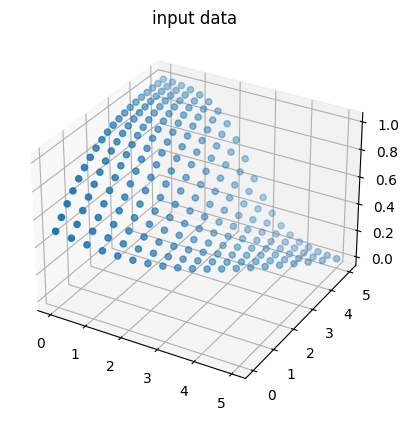

In [22]:
# load data
XLABS = [
    "S1",
    "S2",
]
data = pd.read_csv("./weber_data.csv")
show_results = partial(show_results_complete, data_= data, projection="3d")
show_results(label="input data")

X, y = data[XLABS], data["difference_detected"]

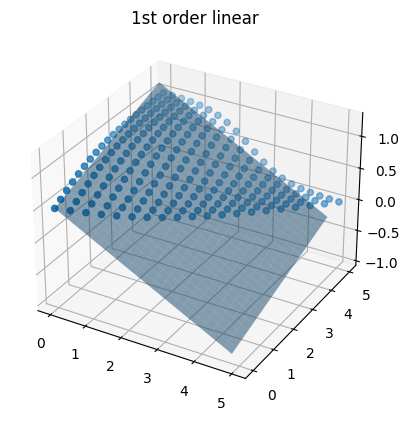

In [23]:
# %% Fit first using a super-simple linear regression

first_order_linear_estimator = LinearRegression()
first_order_linear_estimator.fit(X, y)

show_results(estimator=first_order_linear_estimator, label="1st order linear")

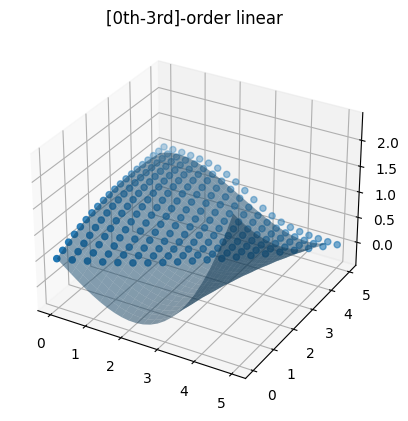

In [24]:
# %% Fit using a 0-3 order polynomial, getting the best fit for the data.
polynomial_estimator = GridSearchCV(
    make_pipeline(PolynomialFeatures(), LinearRegression(fit_intercept=False)),
    param_grid=dict(polynomialfeatures__degree=range(4)),
)
polynomial_estimator.fit(X, y)

show_results(estimator=polynomial_estimator, label="[0th-3rd]-order linear")

In [ ]:
# initialize model
# hyper parameters

prior_par = {
    "Nopi_/": 5.912205942815285,
            "Nopi_cosh": 8.12720511103694,
            "Nopi_-": 3.350846072163632,
            "Nopi_sin": 5.965917796154835,
            "Nopi_tan": 8.127427922862411,
            "Nopi_tanh": 7.799259068142255,
            "Nopi_**": 6.4734429542245495,
            "Nopi_pow2": 3.3017352779079734,
            "Nopi_pow3": 5.9907496760026175,
            "Nopi_exp": 4.768665265735502,
            "Nopi_log": 4.745957377206544,
            "Nopi_sqrt": 4.760686909134266,
            "Nopi_cos": 5.452564657261127,
            "Nopi_sinh": 7.955723540761046,
            "Nopi_abs": 6.333544134938385,
            "Nopi_+": 5.808163661224514,
            "Nopi_*": 5.002213595420244,
            "Nopi_fac": 10.0,
            "Nopi2_*": 1.0,
            "Nopi_sig": 1.0,
            "Nopi_relu": 1.0,
}

# temperatures
ts = [1.0] + [1.04**k for k in range(1, 20)]

# epoch num
epochs = 1500

# fit model
estimator = BMSRegressor(prior_par, ts, epochs)
estimator = estimator.fit(X, y)

# model estimate
show_results(
    estimator=estimator, label="BMS Regressor"
)
print(estimator.model_)

# model prediction
test_x = X.head()
estimator.predict(test_x)

INFO:autora.skl.bms:BMS fitting started
INFO:autora.theorist.bms.utils:Finish iteration 0
INFO:autora.theorist.bms.utils:Finish iteration 1
INFO:autora.theorist.bms.utils:Finish iteration 2
INFO:autora.theorist.bms.utils:Finish iteration 3
INFO:autora.theorist.bms.utils:Finish iteration 4
INFO:autora.theorist.bms.utils:Finish iteration 5
INFO:autora.theorist.bms.utils:Finish iteration 6
INFO:autora.theorist.bms.utils:Finish iteration 7
INFO:autora.theorist.bms.utils:Finish iteration 8
INFO:autora.theorist.bms.utils:Finish iteration 9
INFO:autora.theorist.bms.utils:Finish iteration 10
INFO:autora.theorist.bms.utils:Finish iteration 11
INFO:autora.theorist.bms.utils:Finish iteration 12
INFO:autora.theorist.bms.utils:Finish iteration 13
INFO:autora.theorist.bms.utils:Finish iteration 14
INFO:autora.theorist.bms.utils:Finish iteration 15
INFO:autora.theorist.bms.utils:Finish iteration 16
INFO:autora.theorist.bms.utils:Finish iteration 17
INFO:autora.theorist.bms.utils:Finish iteration 18
I

INFO:autora.theorist.bms.utils:Finish iteration 159
INFO:autora.theorist.bms.utils:Finish iteration 160
INFO:autora.theorist.bms.utils:Finish iteration 161
INFO:autora.theorist.bms.utils:Finish iteration 162
INFO:autora.theorist.bms.utils:Finish iteration 163
INFO:autora.theorist.bms.utils:Finish iteration 164
INFO:autora.theorist.bms.utils:Finish iteration 165
INFO:autora.theorist.bms.utils:Finish iteration 166
INFO:autora.theorist.bms.utils:Finish iteration 167
INFO:autora.theorist.bms.utils:Finish iteration 168
INFO:autora.theorist.bms.utils:Finish iteration 169
INFO:autora.theorist.bms.utils:Finish iteration 170
INFO:autora.theorist.bms.utils:Finish iteration 171
INFO:autora.theorist.bms.utils:Finish iteration 172
INFO:autora.theorist.bms.utils:Finish iteration 173
INFO:autora.theorist.bms.utils:Finish iteration 174
INFO:autora.theorist.bms.utils:Finish iteration 175
INFO:autora.theorist.bms.utils:Finish iteration 176
INFO:autora.theorist.bms.utils:Finish iteration 177
INFO:autora.

INFO:autora.theorist.bms.utils:Finish iteration 317
INFO:autora.theorist.bms.utils:Finish iteration 318
INFO:autora.theorist.bms.utils:Finish iteration 319
INFO:autora.theorist.bms.utils:Finish iteration 320
INFO:autora.theorist.bms.utils:Finish iteration 321
INFO:autora.theorist.bms.utils:Finish iteration 322
INFO:autora.theorist.bms.utils:Finish iteration 323
INFO:autora.theorist.bms.utils:Finish iteration 324
INFO:autora.theorist.bms.utils:Finish iteration 325
INFO:autora.theorist.bms.utils:Finish iteration 326
INFO:autora.theorist.bms.utils:Finish iteration 327
INFO:autora.theorist.bms.utils:Finish iteration 328
INFO:autora.theorist.bms.utils:Finish iteration 329
INFO:autora.theorist.bms.utils:Finish iteration 330
INFO:autora.theorist.bms.utils:Finish iteration 331
INFO:autora.theorist.bms.utils:Finish iteration 332
INFO:autora.theorist.bms.utils:Finish iteration 333
INFO:autora.theorist.bms.utils:Finish iteration 334
INFO:autora.theorist.bms.utils:Finish iteration 335
INFO:autora.

INFO:autora.theorist.bms.utils:Finish iteration 475
INFO:autora.theorist.bms.utils:Finish iteration 476
INFO:autora.theorist.bms.utils:Finish iteration 477
INFO:autora.theorist.bms.utils:Finish iteration 478
INFO:autora.theorist.bms.utils:Finish iteration 479
INFO:autora.theorist.bms.utils:Finish iteration 480
INFO:autora.theorist.bms.utils:Finish iteration 481
INFO:autora.theorist.bms.utils:Finish iteration 482
INFO:autora.theorist.bms.utils:Finish iteration 483
INFO:autora.theorist.bms.utils:Finish iteration 484
INFO:autora.theorist.bms.utils:Finish iteration 485
INFO:autora.theorist.bms.utils:Finish iteration 486
INFO:autora.theorist.bms.utils:Finish iteration 487
INFO:autora.theorist.bms.utils:Finish iteration 488
INFO:autora.theorist.bms.utils:Finish iteration 489
INFO:autora.theorist.bms.utils:Finish iteration 490
INFO:autora.theorist.bms.utils:Finish iteration 491
INFO:autora.theorist.bms.utils:Finish iteration 492
INFO:autora.theorist.bms.utils:Finish iteration 493
INFO:autora.

In [ ]:
estimator.present_results()
